In [ ]:
import numpy as np
import math
import pickle

In [ ]:
CA_1 = np.load('Conditional_Activity_matrix_1.npy')
CA_1[np.isnan(CA_1)] = 0
print(CA_1)

In [2]:
CA_1 = np.load('Conditional_Activity_matrix_1.npy')
CA_1[np.isnan(CA_1)] = 0
print(CA_1)

[[ 1.05595643  0.          0.         ...  0.05318166  0.00558228
   0.00275626]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 1.49506154  0.          0.         ...  0.61462432  0.01453095
   0.00186242]
 [ 0.55998895  0.          0.         ...  0.22204827  0.36155781
  -0.04326214]
 [ 0.1413746   0.          0.         ...  0.15367977 -0.09482674
   0.26227839]]


In [4]:
# Find the highest value
highest_value = np.max(CA_1)

# Find the lowest value
lowest_value = np.min(CA_1)

# Print the results
print(f"The highest value is: {highest_value}")
print(f"The lowest value is: {lowest_value}")

The highest value is: 8.48377376513723
The lowest value is: -2.450241455147256


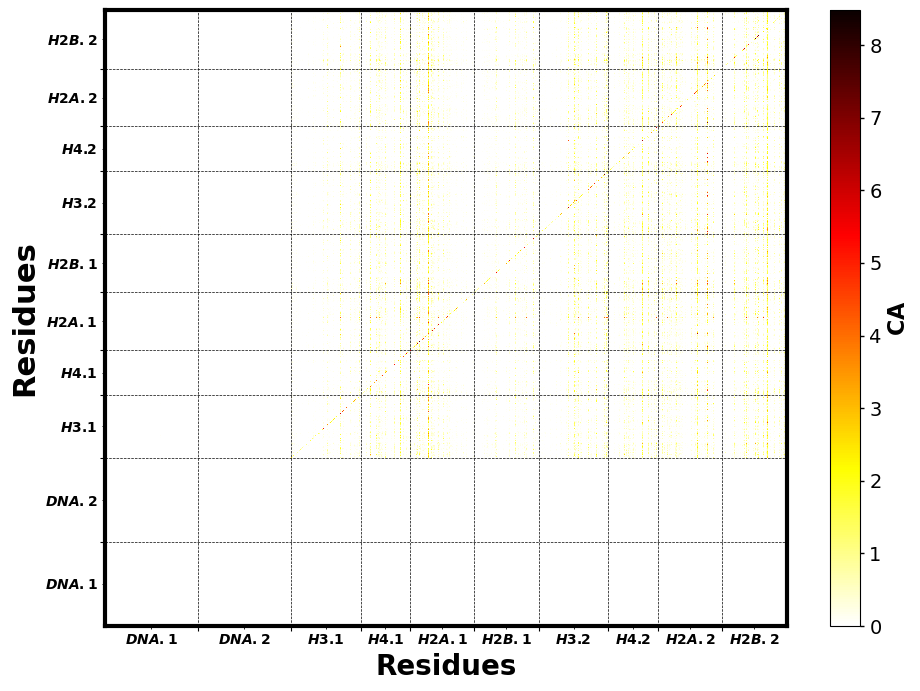

In [ ]:
# # Plot heatmap for conditional activity matrix ----------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(11, 8))
orig_map=plt.get_cmap('hot')
reversed_map = orig_map.reversed()
im=ax.imshow(CA_1,interpolation='nearest', origin='lower', cmap = reversed_map, aspect='auto', vmin=0)
ax.set_xticks([146, 293, 403, 481, 582, 684, 794, 872, 973], minor=False)
ax.set_yticks([146, 293, 403, 481, 582, 684, 794, 872, 973], minor=False)
ax.set_xticks([73.0, 219.5, 348.0, 442.0, 531.5, 633.0, 739.0, 833.0, 922.5, 1024.0],labels=[r'$\bf{\it{DNA.1}}$', r'$\bf{\it{DNA.2}}$',r'$\bf{\it{H3.1}}$', r'$\bf{\it{H4.1}}$',r'$\bf{\it{H2A.1}}$', r'$\bf{\it{H2B.1}}$',r'$\bf{\it{H3.2}}$', r'$\bf{\it{H4.2}}$',r'$\bf{\it{H2A.2}}$', r'$\bf{\it{H2B.2}}$'], minor=True)
ax.set_yticks([73.0, 219.5, 348.0, 442.0, 531.5, 633.0, 739.0, 833.0, 922.5, 1024.0],labels=[r'$\bf{\it{DNA.1}}$', r'$\bf{\it{DNA.2}}$',r'$\bf{\it{H3.1}}$', r'$\bf{\it{H4.1}}$',r'$\bf{\it{H2A.1}}$', r'$\bf{\it{H2B.1}}$',r'$\bf{\it{H3.2}}$', r'$\bf{\it{H4.2}}$',r'$\bf{\it{H2A.2}}$', r'$\bf{\it{H2B.2}}$'], minor=True)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.grid(True, which='major', color='black', linestyle='--', linewidth=0.5)
ax.yaxis.grid(True, which='major', color='black', linestyle='--', linewidth=0.5)
cbar2 = fig.colorbar(im)
cbar2.ax.set_ylabel(r'$\it\bf CA$', fontsize = 16.0, fontweight="bold")
cbar2.ax.tick_params(axis='y', labelsize=14, length=3, width=1)

plt.tick_params(labelsize=16, pad=1)
plt.xlabel("Residues", fontsize = 20.0, fontweight="bold")
plt.ylabel("Residues", fontsize = 22.0, fontweight="bold")
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#### FDR Corrections

In [ ]:
import sys
import os

# 1. Double check the path is exact (no typos)
folder_path = '/conditional_activity/conditional_activity/analysis'

if folder_path not in sys.path:
    sys.path.append(folder_path)

# 2. Call Class
from fdr import CONDACT_FDR

In [ ]:
fdr = CONDACT_FDR(
    transition_times_file="transition_times.pkl",
    CA_matrix_file="Conditional_Activity_matrix.npy",
    dihedral_csv="Dihedral_Angle.csv",  # <-- used to get total time
    n_perm=1000,
    q=0.05,
    CA_cutoff=1.0,
    upper_triangle_only = False,
    total_time = 5039760 #Total length of simulation in ps if Dihedral_Angle.csv is not given
)

pvals, qvals, sig = fdr.run()

Observation_time (tau) = 5039760
Min transitions required per residue = 11
Tested directed edges (CA >= 1.0 and >=11 transitions): 8092
Finite p-values: 8092
Significant at FDR q <= 0.05: 169


#### Communication Path

In [ ]:
import sys
import os

# 1. Double check the path is exact (no typos)
folder_path = '/conditional_activity/conditional_activity/analysis'

if folder_path not in sys.path:
    sys.path.append(folder_path)

# 2. Match the filename (fdr.py -> fdr) 
from trace_route import CONDACT_CommPath

In [ ]:
# Inter-residue distances
res_dist = np.load('Inter_residue_distance.npy')
res_dist[np.isnan(res_dist)] = 0
print(res_dist)

[[ 0.          5.14359236  9.64654884 ... 91.8598353  93.29259394
  95.23976333]
 [ 5.14359236  0.          5.06038371 ... 91.26432163 92.64442588
  94.60786606]
 [ 9.64654884  5.06038371  0.         ... 89.20214735 90.71631844
  92.89351112]
 ...
 [91.8598353  91.26432163 89.20214735 ...  0.          4.78795951
   9.61560906]
 [93.29259394 92.64442588 90.71631844 ...  4.78795951  0.
   7.71042851]
 [95.23976333 94.60786606 92.89351112 ...  9.61560906  7.71042851
   0.        ]]


In [30]:
comm = CONDACT_CommPath(CA_1, res_dist, labels=labels)

# 1) enumerate paths between residue labels
paths = comm.enumerate_paths(start="ARG 823", target=None,
                            cutoff=10.0, min_ca=0.0,
                            max_depth=6, top_k=10, score="sum")
comm.print_paths(paths, top=20)

  1. score=5.457 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → VAL 645
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.125
  2. score=5.451 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → VAL 898
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.119
  3. score=5.435 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → GLU 886
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.103
  4. score=5.430 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → LEU 890
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.098
  5. score=5.398 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → ILE 642
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.066
  6. score=5.378 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ILE 966 → ILE 905
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.620 → 0.353
  7. score=5.352 | ARG 823 → ARG 821 → PRO 824 → ARG 961 → ILE 962 → ASN 889 → LEU 646
     CA: 2.286 → 0.290 → 0.008 → 0.821 → 1.927 → 0.020
  8. s

#### Connected Domains

In [40]:
CA_matrix = np.load('Conditional_Activity_matrix_1.npy')
CA_matrix[np.isnan(CA_matrix)] = 0
CA_sym = 0.5 * (CA_matrix + CA_matrix.T)

vals, vecs = np.linalg.eigh(CA_sym)
vals
print(vals)

[-49.71495711 -15.92241258 -12.58330563 ...  26.78462927  35.67438079
  80.17555854]


In [42]:
# Select largest eigenvalue/eigenvector
# Find the index (idx) of the largest eigenvalue (by value, not magnitude).
# Grab that eigenvalue (lam_max) and its eigenvector (v_max = corresponding column of vecs).

idx = np.argmax(vals)
lam_max = vals[idx]
v_max = vecs[:, idx]

# Normalize (just in case)
v_max = v_max / np.linalg.norm(v_max)
v_max

array([8.20022631e-02, 0.00000000e+00, 3.33066907e-16, ...,
       2.34692825e-02, 1.25518269e-02, 1.24804486e-02])

In [ ]:
# Create dictionary of residue → Principal Eigenvector
prin_eigen = dict(zip(labels, v_max))

print(f"Maximum eigenvalue: {lam_max} \n")

# Your dictionary
values_list  = [round(max(0, val), 7) for val in prin_eigen.values()]

# Print List
print(values_list)

Maximum eigenvalue: 80.17555854131463 

[0.0820023, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0245406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0540486, 0, 0.1220694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0872384, 0.0262257, 0.0362169, 0.0